# FDTD Meep gratings

[Meep](https://meep.readthedocs.io/en/latest/) can also compute grating coupler Sparameters and far field.


## grating sparameters

```bash

                fiber_xposition
                     |
                fiber_core_diameter
             /     /  /     /       |
            /     /  /     /        | fiber_thickness
           /     /  /     /    _ _ _| _ _ _ _ _ _  _
                                    |
                                    | air_gap_thickness
                               _ _ _| _ _ _ _ _ _  _
                                    |
                   nclad            | top_clad_thickness
                               _ _ _| _ _ _ _ _ _  _
                _|-|_|-|_|-|___     |              _| etch_depth
                 ncore        |     |core_thickness
                ______________|_ _ _|_ _ _ _ _ _ _ _
                                    |
                 nbox               |box_thickness
                ______________ _ _ _|_ _ _ _ _ _ _ _
                                    |
                 nsubstrate         |substrate_thickness
                ______________ _ _ _|


```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gdsfactory as gf
import gdsfactory.simulation.gmeep as gm
import gdsfactory.simulation as sim

2022-04-29 12:49:56.509 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.3.4


2022-04-29 12:49:58.081 | INFO     | gdsfactory.simulation.gmeep:<module>:28 - Meep '1.23.0' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep']


Using MPI version 4.0, 1 processes


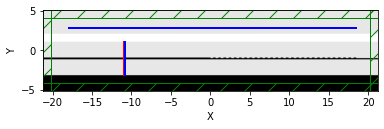

In [2]:
df = gm.write_sparameters_grating(plot=True)

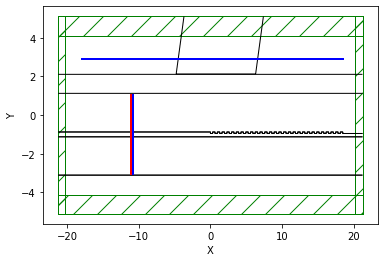

In [3]:
df = gm.write_sparameters_grating(plot=True, plot_contour=True)

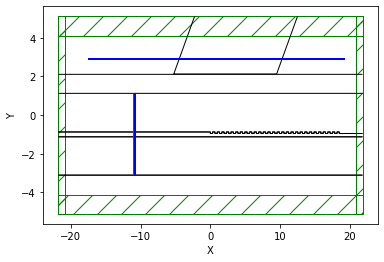

In [4]:
df = gm.write_sparameters_grating(plot=True, plot_contour=True, fiber_angle_deg=45)

`plot=True` only plots the simulations for you to review that is set up **correctly**

However the core and cladding index of the fiber are very close to 1.44, so it's hard to see. You can also use

`plot_contour=True` to plot only the contour of the simulation shapes.

In [5]:
df20 = gm.write_sparameters_grating()  # fiber_angle_deg = 20

2022-04-29 12:50:00.617 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_grating:write_sparameters_grating:111 - sparameters loaded from '/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/fiber_99914b93.csv'


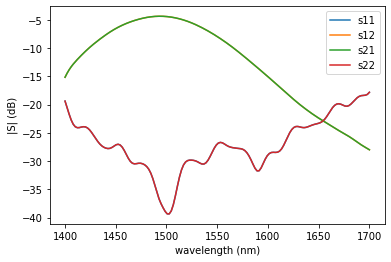

In [6]:
sim.plot.plot_sparameters(df20)

2022-04-29 12:50:01.098 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_grating:write_sparameters_grating:111 - sparameters loaded from '/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/fiber_d072751b.csv'


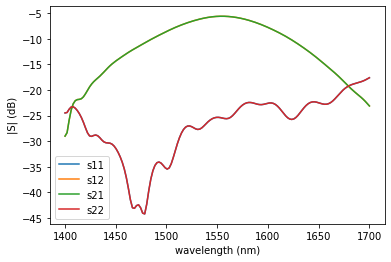

In [7]:
df = gm.write_sparameters_grating(fiber_angle_deg=15)
sim.plot.plot_sparameters(df)

### Single core

Running on a single CPU core can be slow as the a single core needs to update all the simulation grid points sequentially.

### Multicore (MPI)

You can divide each simulation into multiple cores thanks to [MPI (message passing interface)](https://en.wikipedia.org/wiki/Message_Passing_Interface)


### Batch

You can also run a batch of multicore simulations

## Far field

TODO